In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
print(hub.__version__)

0.15.0


In [3]:
print("GPU", "availabe (Yes GPU)" if tf.config.list_logical_devices("GPU") else "No GPU")

GPU No GPU


## Check out the labels of our data

In [4]:
import pandas as pd
labels_csv = pd.read_csv("Dog_Bread/labels.csv")

In [5]:
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


<Axes: >

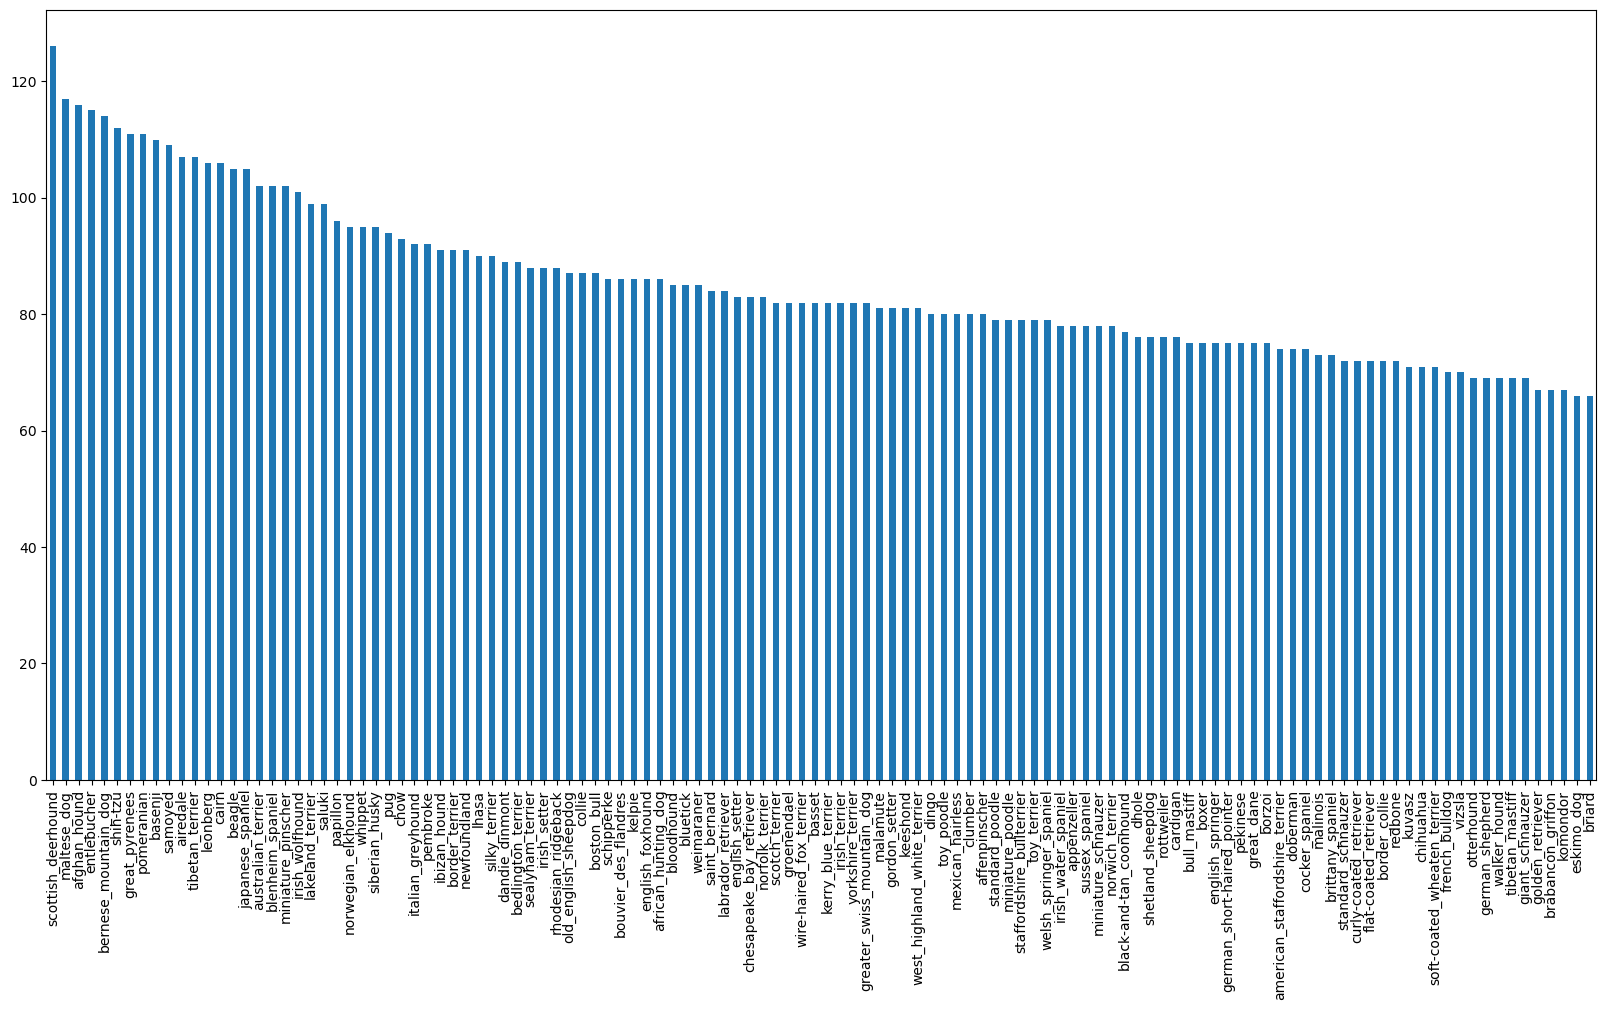

In [7]:
#How many images are there of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [8]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [9]:
#Calculate mean value
labels_csv["breed"].value_counts().mean()

85.18333333333334

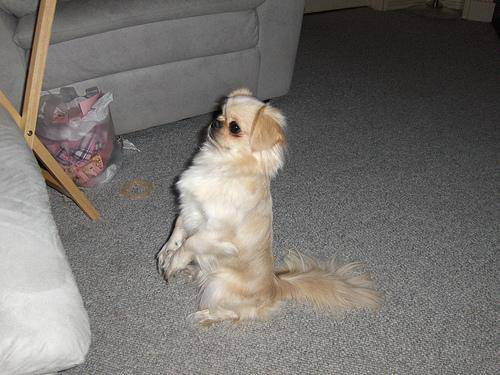

In [10]:
#Lets view image
from IPython.display import Image
Image("Dog_Bread/train/001cdf01b096e06d78e9e5112d419397.jpg")

## Geting images and their labels

In [11]:
#Create pathnames from images ID's
filenames = ["Dog_Bread/train/" + fname +".jpg" for fname in labels_csv["id"]]

#Check the first 10
filenames[:10]

['Dog_Bread/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Dog_Bread/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Dog_Bread/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Dog_Bread/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Dog_Bread/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'Dog_Bread/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'Dog_Bread/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'Dog_Bread/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'Dog_Bread/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'Dog_Bread/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
#Check whether number of filename matches number of actual images files.

import os
if len(os.listdir("Dog_Bread/train/")) == len(filenames):
    print("Filenames are matches actual of files")
else:
    print("Filenames do not match actual amount of files")
        
    
    




Filenames are matches actual of files


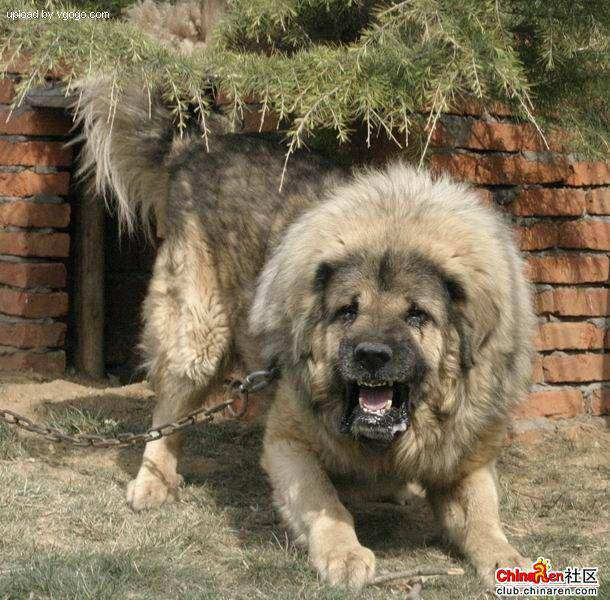

In [13]:
# One more checks images
Image(filenames[9000])

In [14]:
labels_csv["breed"][9000]

'tibetan_mastiff'

## Now Prepare our labels

In [15]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(labels)

10222

In [17]:
#See if the numbers of labels matches the number of filenames
if len(labels) == len(filenames):
    print("Numbers of labels matches of filenames")
else:
    print("Numbers of labels does not matches of filenames")
        

Numbers of labels matches of filenames


In [18]:
# File name unique labels values

unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
len(unique_breeds)

120

In [20]:
#Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
#Turn every label into a boolen array

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

## Example: Turning boolean array into integers

In [23]:
print(labels[0]) #Original label
print(np.where(unique_breeds == labels[0])) #Index where label occurs
print(boolean_labels[0].argmax()) #Index where labels occurs in boolean array
print(boolean_labels[0].astype(int)) #There will be a 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
filenames[:10]

['Dog_Bread/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Dog_Bread/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Dog_Bread/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Dog_Bread/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Dog_Bread/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'Dog_Bread/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'Dog_Bread/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'Dog_Bread/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'Dog_Bread/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'Dog_Bread/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Creating our own validation set

In [26]:
# Setup X and Y variables
X = filenames
y = boolean_labels

In [27]:
len(filenames), len(boolean_labels)

(10222, 10222)

## Now we are working to start off experimenting with ~1000 images and increse as needed.

In [28]:
# Set numbers of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000, step: 1000} #Only work in colab.

In [29]:
# Lets split our data into train validation sets
from sklearn.model_selection import train_test_split


#Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [30]:
X_train[:5], y_train[:5]

(['Dog_Bread/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'Dog_Bread/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'Dog_Bread/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'Dog_Bread/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'Dog_Bread/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing Image (turning images into Tensor)
To Preprocess our images into Tensor we'are going to write a function which does a few things:
1. Take an images filpath as input
2. Use TensorFlow to read the file and save it toa varibale, `image` 
3. Turn our `image` a (jpj) into Tensor
4. Normalize our image(convert colour channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modify `image`


In [31]:
#Before image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape # height x width x 3

(257, 350, 3)

In [32]:
image.max(),image.min()

(255, 0)

In [33]:
image #Tensor is very similar to numpy array.

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [34]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [35]:
#Define tha image size
IMG_SIZE = 224

#Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an images file path and turns the images into tensor.
    """
    #Read in an images file
    image = tf.io.read_file(image_path)
    #Turn the jpg images into numerical Tensor 3 colour channels(Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    #Convert the colour channel values from 0-255 to 0-1 values.
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image into our desired value (224, 224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image
    

In [36]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

## Turning our data into batches
Why turn our data into batches?
Let's try you are to process 10,000+ images in one go...... they all might not fit into memory.
So thats why we do about 32(this is batch size)
images at a time( you can manually adjust the batch size if need be)

In order to use Tensorflow effectively, we need our data in tha form of Tensor tuples which look like this.(`image, labels`)

In [37]:
#Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated labels, processess theimage and return a type of(image, labels)
    """
    image = process_image(image_path)
    return image, label

In [38]:
#Demo of the above
(process_image(X[42]), tf.constant(y[42])) # index 42 (X[42]) and creating a TensorFlow constant with the corresponding label (y[42]).

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## Now we are got to way our data into tuples of tensors in the form `(images, label)` let's make a function to turn all out of our data (x&y) into batches.


In [39]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data out of image (X) and label (Y) pairs.
    Shuffle the data if it's training data but doesn't shuffle if it is validation data.
    Also accept test data as input (no labels).
    """
    # If the data is test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))  # Only file path (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    # If the data is validation dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                                   tf.constant(y)))  # Filepath and labels
        
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        # Turn filepath and labels into Tensor
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                                   tf.constant(y)))
        
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffle
        data = data.shuffle(buffer_size=len(X))
        # Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        return data_batch


In [40]:
#Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [41]:
#Check out the diffrent attributes of our data batches.
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [42]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Visualizing Data Batches
Our data is now batches, however these can be a little hard to understand/comprehend, let's visualize the data

In [43]:
#Create a function for viewing images in data batches.
import matplotlib.pyplot as plt

def show_25_images(images,labels):
    """
    Display a plot of 25 images and their labels from a data batch.
    """
    #Setup the figure
    plt.figure(figsize=(10,10))
    #Loop through 25 (for displaying 25 images)
    for i in range(25):
        #Create subplots (5 rows and 5 columns)
        ax = plt.subplot(5, 5, i+1)
        #Display an image
        plt.imshow(images[i])
        #Add image labels as a title
        plt.title(unique_breeds[labels[i].argmax()])
        #Turn the grid lines off
        plt.axis("off")

In [44]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [45]:
len(train_images), len(train_labels)

NameError: name 'train_images' is not defined

In [ ]:
train_data

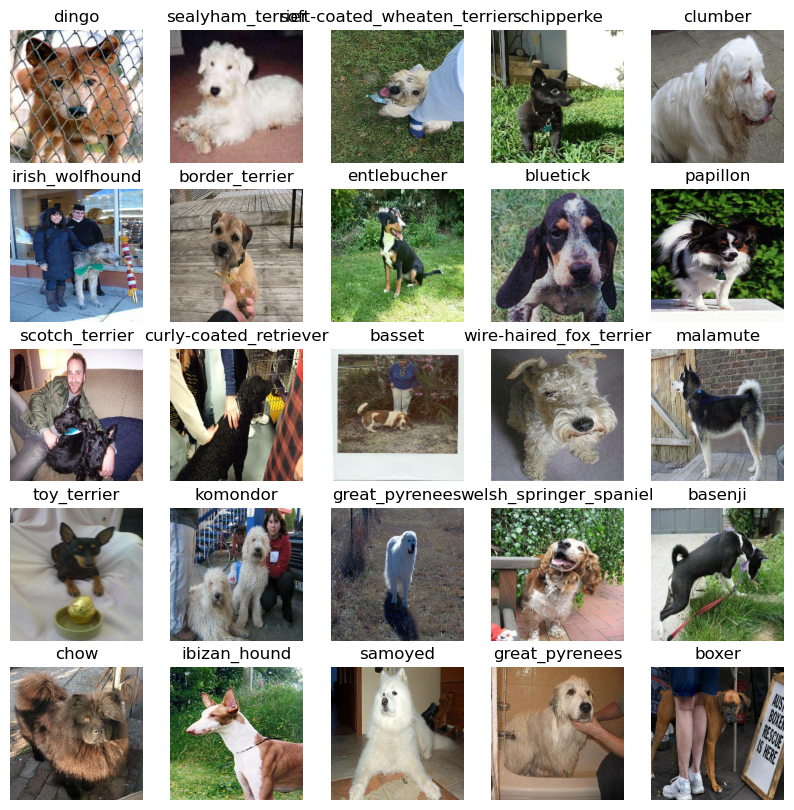

In [46]:
#Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

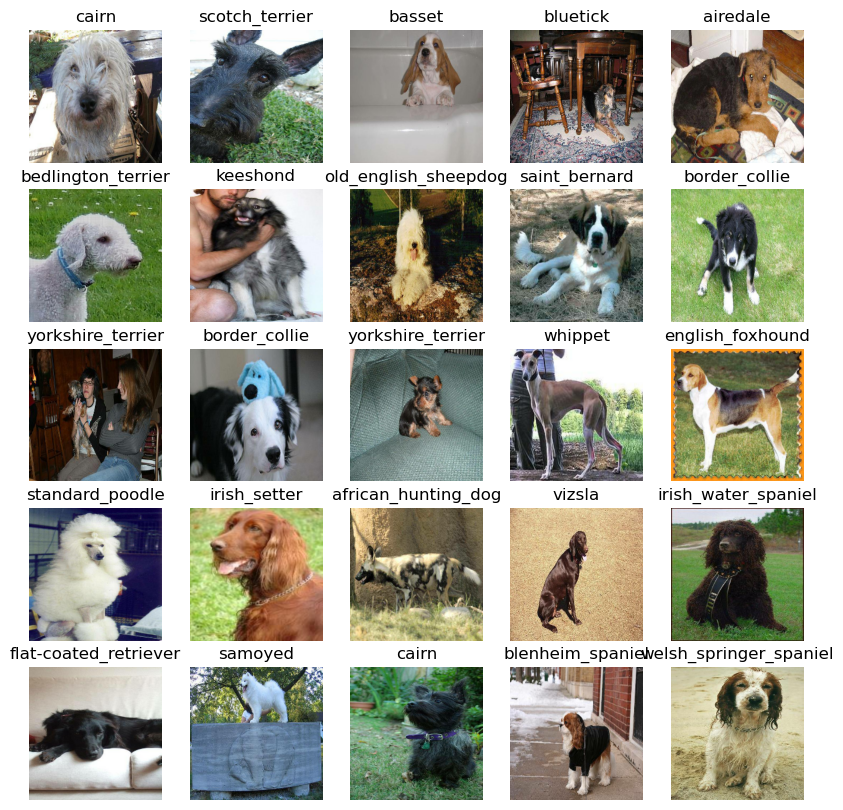

In [47]:
#Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build a model, thereare few things we need define:

* The input shape (our images shape, in the form of Tensors)to our model.
* The output shape (image labels, in the form of Tensor) of our model.
* The URL of the model we want to use

In [48]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, colour channels

#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from Tensorflow HUB
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [49]:
IMG_SIZE

224

TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.
## * Train a model with a smaller dataset
* Improve gereralization, and
* Speed up training
## Deffrence between Keras functional Api and Keras Sequential API


Now we've got our inputs and outputs model ready to go. Let's put them together them into keras deep learning model
Let's create a function which:
* Take the input shape, output shape, and model we've chosen as parameters.
* Define the layers in a Keras model in Sequential fashin(do this first, then this, then that).
* Compiles the model(tells the model the input shape it'll be getting)
* Builds the model(tells the model the input shape it ill be getting)
* Returns the model.
Allof these steps can be found here: https://www.tensorflow.org/guide/keras

In [50]:
#Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", MODEL_URL)
    
    #Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), #Layer 1(input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax") #Layer 2 (output layer)
    ])
    
    #Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["Accuracy"]
    )
    
    #Build the model
    model.build(INPUT_SHAPE)
    return model

In [53]:
#model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating the callbacks
Tensorboard Callbacks.
To setup the tensorboard callbacks we need 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (We'll do this after model training).

In [54]:
#Load the TensorBoard Extension
%load_ext tensorboard

In [55]:
import datetime
#Create a function to build a Tensorboard callback
def create_tensorboard_callback():
    logdir = os.path.join("Dog_Bread/logs",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callbacks

In [56]:
#Create early stoping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3)

### Training The model (on subset of data)

In [57]:
NUM_EPOCHS = 100 #@param {type:"slider, min:10, max:100, steps:10"}

Lets create a function to train and return a train a model.
* Create a model using `create_model()`
* Setup a Tensorboard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, numbers of epochs to train for callbacks we'd like to use
* Return the model

In [59]:
#Build a function to train and return a trained model
def train_model():
    """
    Trains a given model and returns the trained version.
    """
    #Create a model
    model = create_model()
    
    #Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()
    
    #Fit the model to the data passing it the callbacks we created
    
    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard, early_stopping])
    #return model
    return model

In [ ]:
#Fit the model to the data
model = train_model() #800/32 = 25 traing 25 steps || validation, 200/32 = 6.25 or 7.

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100



25/25 [==============================] - ETA: 0s - loss: 4.6120 - Accuracy: 0.0913WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 26s 862ms/step - loss: 4.6120 - Accuracy: 0.0913 - val_loss: 3.4466 - val_Accuracy: 0.2800
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 1.6588 - Accuracy: 0.6762WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 798ms/step - loss: 1.6588 - Accuracy: 0.6762 - val_loss: 2.2829 - val_Accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.5757 - Accuracy: 0.9350WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 19s 783ms/step - loss: 0.5757 - Accuracy: 0.9350 - val_loss: 1.8001 - val_Accuracy: 0.5500
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.2624 - Accuracy: 0.9875WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 795ms/step - loss: 0.2624 - Accuracy: 0.9875 - val_loss: 1.5791 - val_Accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - ETA: 0s - loss: 0.1504 - Accuracy: 0.9962WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 817ms/step - loss: 0.1504 - Accuracy: 0.9962 - val_loss: 1.4857 - val_Accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - ETA: 0s - loss: 0.1019 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 789ms/step - loss: 0.1019 - Accuracy: 1.0000 - val_loss: 1.4522 - val_Accuracy: 0.6300
Epoch 7/100
25/25 [==============================] - ETA: 0s - loss: 0.0755 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 790ms/step - loss: 0.0755 - Accuracy: 1.0000 - val_loss: 1.4237 - val_Accuracy: 0.6200
Epoch 8/100
25/25 [==============================] - ETA: 0s - loss: 0.0601 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 796ms/step - loss: 0.0601 - Accuracy: 1.0000 - val_loss: 1.3999 - val_Accuracy: 0.6350
Epoch 9/100
25/25 [==============================] - ETA: 0s - loss: 0.0494 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 789ms/step - loss: 0.0494 - Accuracy: 1.0000 - val_loss: 1.3830 - val_Accuracy: 0.6300
Epoch 10/100
25/25 [==============================] - ETA: 0s - loss: 0.0415 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 806ms/step - loss: 0.0415 - Accuracy: 1.0000 - val_loss: 1.3707 - val_Accuracy: 0.6350
Epoch 11/100
25/25 [==============================] - ETA: 0s - loss: 0.0356 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 793ms/step - loss: 0.0356 - Accuracy: 1.0000 - val_loss: 1.3551 - val_Accuracy: 0.6450
Epoch 12/100
25/25 [==============================] - ETA: 0s - loss: 0.0311 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 23s 941ms/step - loss: 0.0311 - Accuracy: 1.0000 - val_loss: 1.3473 - val_Accuracy: 0.6500
Epoch 13/100
25/25 [==============================] - ETA: 0s - loss: 0.0274 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 823ms/step - loss: 0.0274 - Accuracy: 1.0000 - val_loss: 1.3389 - val_Accuracy: 0.6550
Epoch 14/100
25/25 [==============================] - ETA: 0s - loss: 0.0245 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 792ms/step - loss: 0.0245 - Accuracy: 1.0000 - val_loss: 1.3331 - val_Accuracy: 0.6550
Epoch 15/100
25/25 [==============================] - ETA: 0s - loss: 0.0220 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 804ms/step - loss: 0.0220 - Accuracy: 1.0000 - val_loss: 1.3239 - val_Accuracy: 0.6500
Epoch 16/100
25/25 [==============================] - ETA: 0s - loss: 0.0199 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 19s 781ms/step - loss: 0.0199 - Accuracy: 1.0000 - val_loss: 1.3187 - val_Accuracy: 0.6550
Epoch 17/100
25/25 [==============================] - ETA: 0s - loss: 0.0181 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 785ms/step - loss: 0.0181 - Accuracy: 1.0000 - val_loss: 1.3158 - val_Accuracy: 0.6500
Epoch 18/100
25/25 [==============================] - ETA: 0s - loss: 0.0167 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 785ms/step - loss: 0.0167 - Accuracy: 1.0000 - val_loss: 1.3087 - val_Accuracy: 0.6550
Epoch 19/100
25/25 [==============================] - ETA: 0s - loss: 0.0153 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 19s 781ms/step - loss: 0.0153 - Accuracy: 1.0000 - val_loss: 1.3065 - val_Accuracy: 0.6550
Epoch 20/100
25/25 [==============================] - ETA: 0s - loss: 0.0141 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 785ms/step - loss: 0.0141 - Accuracy: 1.0000 - val_loss: 1.3024 - val_Accuracy: 0.6650
Epoch 21/100
25/25 [==============================] - ETA: 0s - loss: 0.0131 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 815ms/step - loss: 0.0131 - Accuracy: 1.0000 - val_loss: 1.2990 - val_Accuracy: 0.6650
Epoch 22/100
25/25 [==============================] - ETA: 0s - loss: 0.0122 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 797ms/step - loss: 0.0122 - Accuracy: 1.0000 - val_loss: 1.2962 - val_Accuracy: 0.6600
Epoch 23/100
25/25 [==============================] - ETA: 0s - loss: 0.0114 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 19s 782ms/step - loss: 0.0114 - Accuracy: 1.0000 - val_loss: 1.2951 - val_Accuracy: 0.6650
Epoch 24/100
25/25 [==============================] - ETA: 0s - loss: 0.0106 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 797ms/step - loss: 0.0106 - Accuracy: 1.0000 - val_loss: 1.2921 - val_Accuracy: 0.6700
Epoch 25/100
25/25 [==============================] - ETA: 0s - loss: 0.0100 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 786ms/step - loss: 0.0100 - Accuracy: 1.0000 - val_loss: 1.2901 - val_Accuracy: 0.6700
Epoch 26/100
25/25 [==============================] - ETA: 0s - loss: 0.0094 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 786ms/step - loss: 0.0094 - Accuracy: 1.0000 - val_loss: 1.2866 - val_Accuracy: 0.6700
Epoch 27/100
25/25 [==============================] - ETA: 0s - loss: 0.0089 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 21s 842ms/step - loss: 0.0089 - Accuracy: 1.0000 - val_loss: 1.2850 - val_Accuracy: 0.6750
Epoch 28/100
25/25 [==============================] - ETA: 0s - loss: 0.0084 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 784ms/step - loss: 0.0084 - Accuracy: 1.0000 - val_loss: 1.2818 - val_Accuracy: 0.6700
Epoch 29/100
25/25 [==============================] - ETA: 0s - loss: 0.0079 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 789ms/step - loss: 0.0079 - Accuracy: 1.0000 - val_loss: 1.2816 - val_Accuracy: 0.6750
Epoch 30/100
25/25 [==============================] - ETA: 0s - loss: 0.0075 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 19s 782ms/step - loss: 0.0075 - Accuracy: 1.0000 - val_loss: 1.2808 - val_Accuracy: 0.6750
Epoch 31/100
25/25 [==============================] - ETA: 0s - loss: 0.0071 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 19s 783ms/step - loss: 0.0071 - Accuracy: 1.0000 - val_loss: 1.2794 - val_Accuracy: 0.6750
Epoch 32/100
25/25 [==============================] - ETA: 0s - loss: 0.0068 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 793ms/step - loss: 0.0068 - Accuracy: 1.0000 - val_loss: 1.2792 - val_Accuracy: 0.6750
Epoch 33/100
25/25 [==============================] - ETA: 0s - loss: 0.0065 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 20s 790ms/step - loss: 0.0065 - Accuracy: 1.0000 - val_loss: 1.2767 - val_Accuracy: 0.6750
Epoch 34/100
25/25 [==============================] - ETA: 0s - loss: 0.0062 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 21s 826ms/step - loss: 0.0062 - Accuracy: 1.0000 - val_loss: 1.2774 - val_Accuracy: 0.6750
Epoch 35/100
25/25 [==============================] - ETA: 0s - loss: 0.0059 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 23s 906ms/step - loss: 0.0059 - Accuracy: 1.0000 - val_loss: 1.2760 - val_Accuracy: 0.6750
Epoch 36/100
25/25 [==============================] - ETA: 0s - loss: 0.0056 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 22s 876ms/step - loss: 0.0056 - Accuracy: 1.0000 - val_loss: 1.2747 - val_Accuracy: 0.6750
Epoch 37/100
25/25 [==============================] - ETA: 0s - loss: 0.0054 - Accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,Accuracy,val_loss,val_Accuracy


25/25 [==============================] - 22s 881ms/step - loss: 0.0054 - Accuracy: 1.0000 - val_loss: 1.2734 - val_Accuracy: 0.6750
Epoch 38/100
 4/25 [===>..........................] - ETA: 14s - loss: 0.0055 - Accuracy: 1.0000